### Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage. Dataset is downloaded from Kaggle.   


###### Link: https://www.kaggle.com/giripujar/hr-analytics


### First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.

## Import all required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.ndim

2

In [4]:
df.shape

(14999, 10)

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [11]:
df.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [12]:
df.notna().sum()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

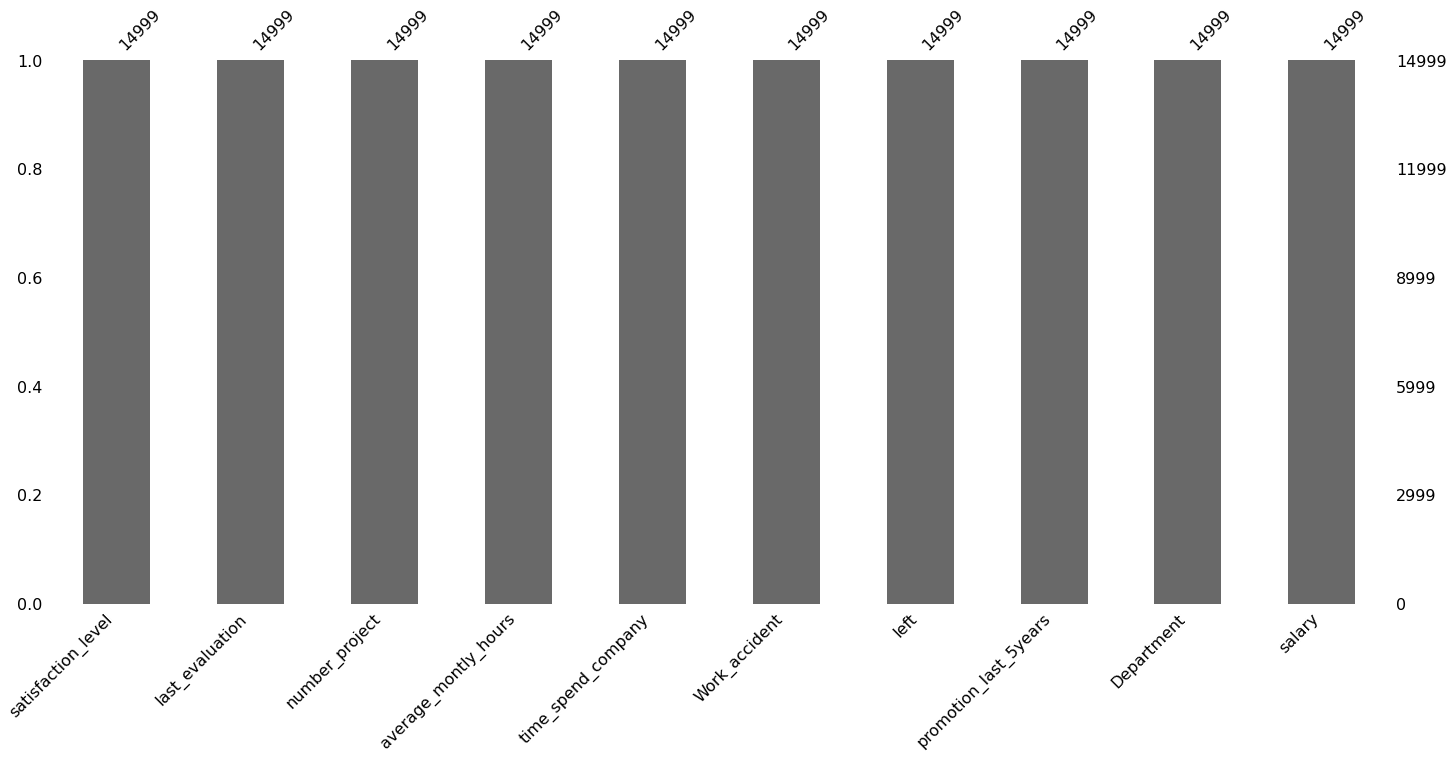

In [13]:
import missingno as msno
msno.bar(df)
plt.show()

In [14]:
df.left.value_counts()


0    11428
1     3571
Name: left, dtype: int64

In [16]:
df.left.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [17]:
 df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [18]:
df.groupby('left').var()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.047134,0.026246,0.960172,2086.911926,2.440931,0.144393,0.025564
1,0.069661,0.039075,3.305725,3745.785838,0.955893,0.045099,0.005294


In [19]:
df.groupby('left').std()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
1,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759


## Data Visualization

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


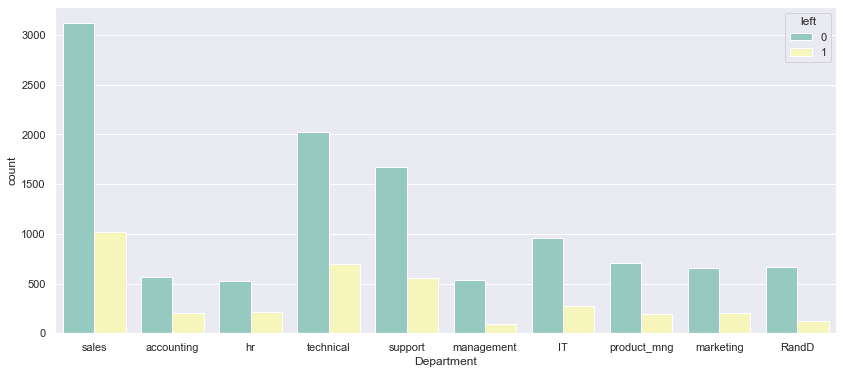

In [25]:
 plt.figure(figsize=(14,6))
sns.countplot(df['Department'],hue=df['left'],data=df, palette="Set3")
plt.show()

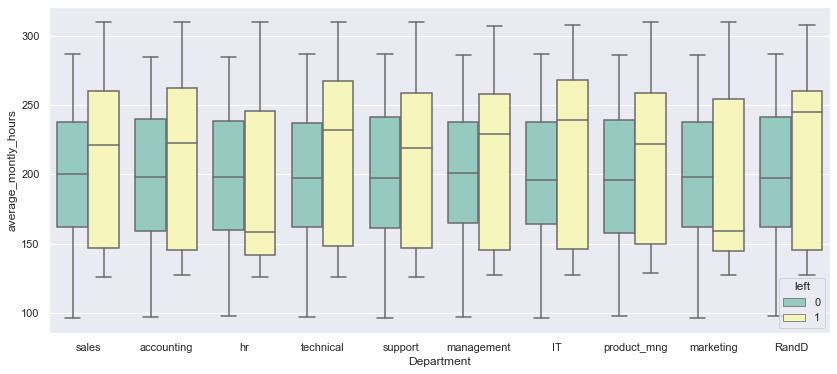

In [27]:
plt.figure(figsize=(14,6))
sns.boxplot(y='average_montly_hours', x='Department', hue= 'left',data=df,palette="Set3")
plt.show()


D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

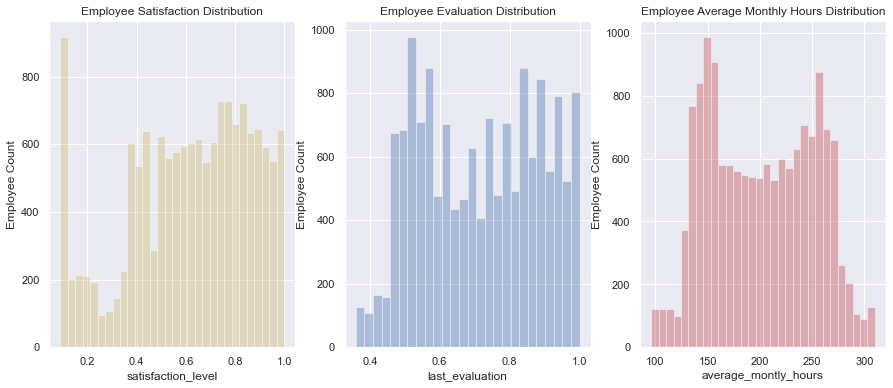

In [41]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(df.satisfaction_level, kde=False, color="y", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

sns.distplot(df.last_evaluation, kde=False, color="b", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

sns.distplot(df.average_montly_hours, kde=False, color="r", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

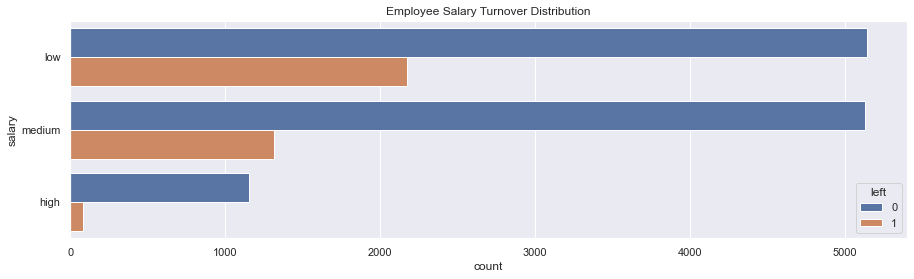

In [43]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Employee Salary Turnover Distribution');

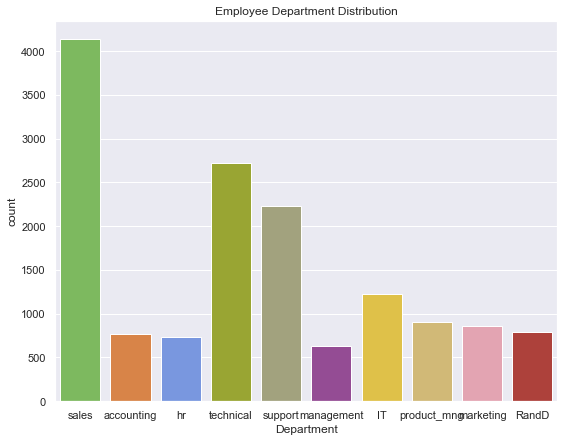

In [44]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');

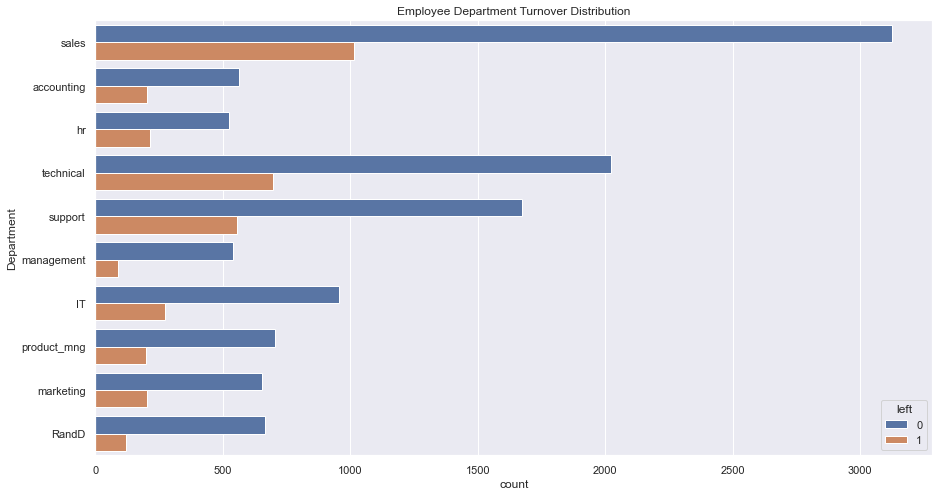

In [45]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="Department", hue='left', data=df).set_title('Employee Department Turnover Distribution');

Text(0.5, 1.0, 'Employee Evaluation Distribution Left vs retained')

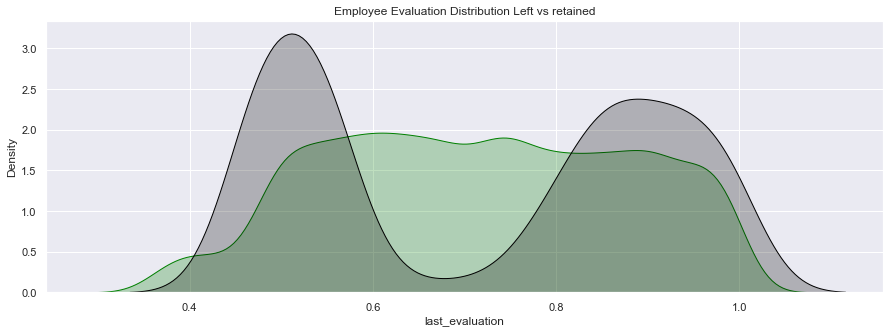

In [46]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['left'] == 0),'last_evaluation'] , color='green',shade=True)
ax=sns.kdeplot(df.loc[(df['left'] == 1),'last_evaluation'] , color='black',shade=True)
plt.title('Employee Evaluation Distribution Left vs retained')

Text(0.5, 1.0, 'Employee Evaluation Distribution Left vs retained')

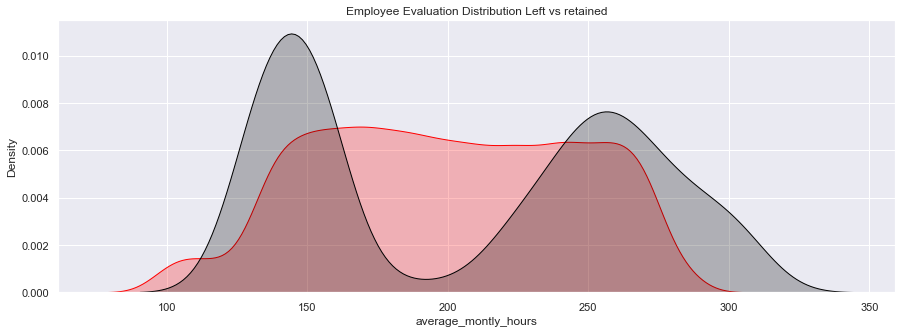

In [47]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='red',shade=True)
ax=sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='black',shade=True )
plt.title('Employee Evaluation Distribution Left vs retained')

Text(0.5, 1.0, 'Employee Evaluation Distribution Left vs retained')

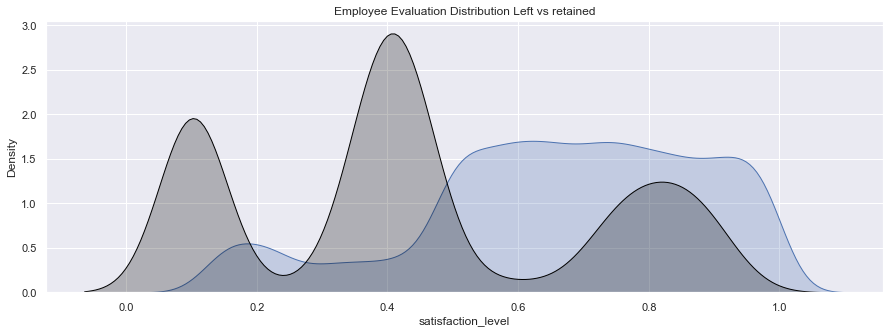

In [48]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction_level'] , color='b',shade=True )
ax=sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction_level'] , color='black',shade=True )
plt.title('Employee Evaluation Distribution Left vs retained')

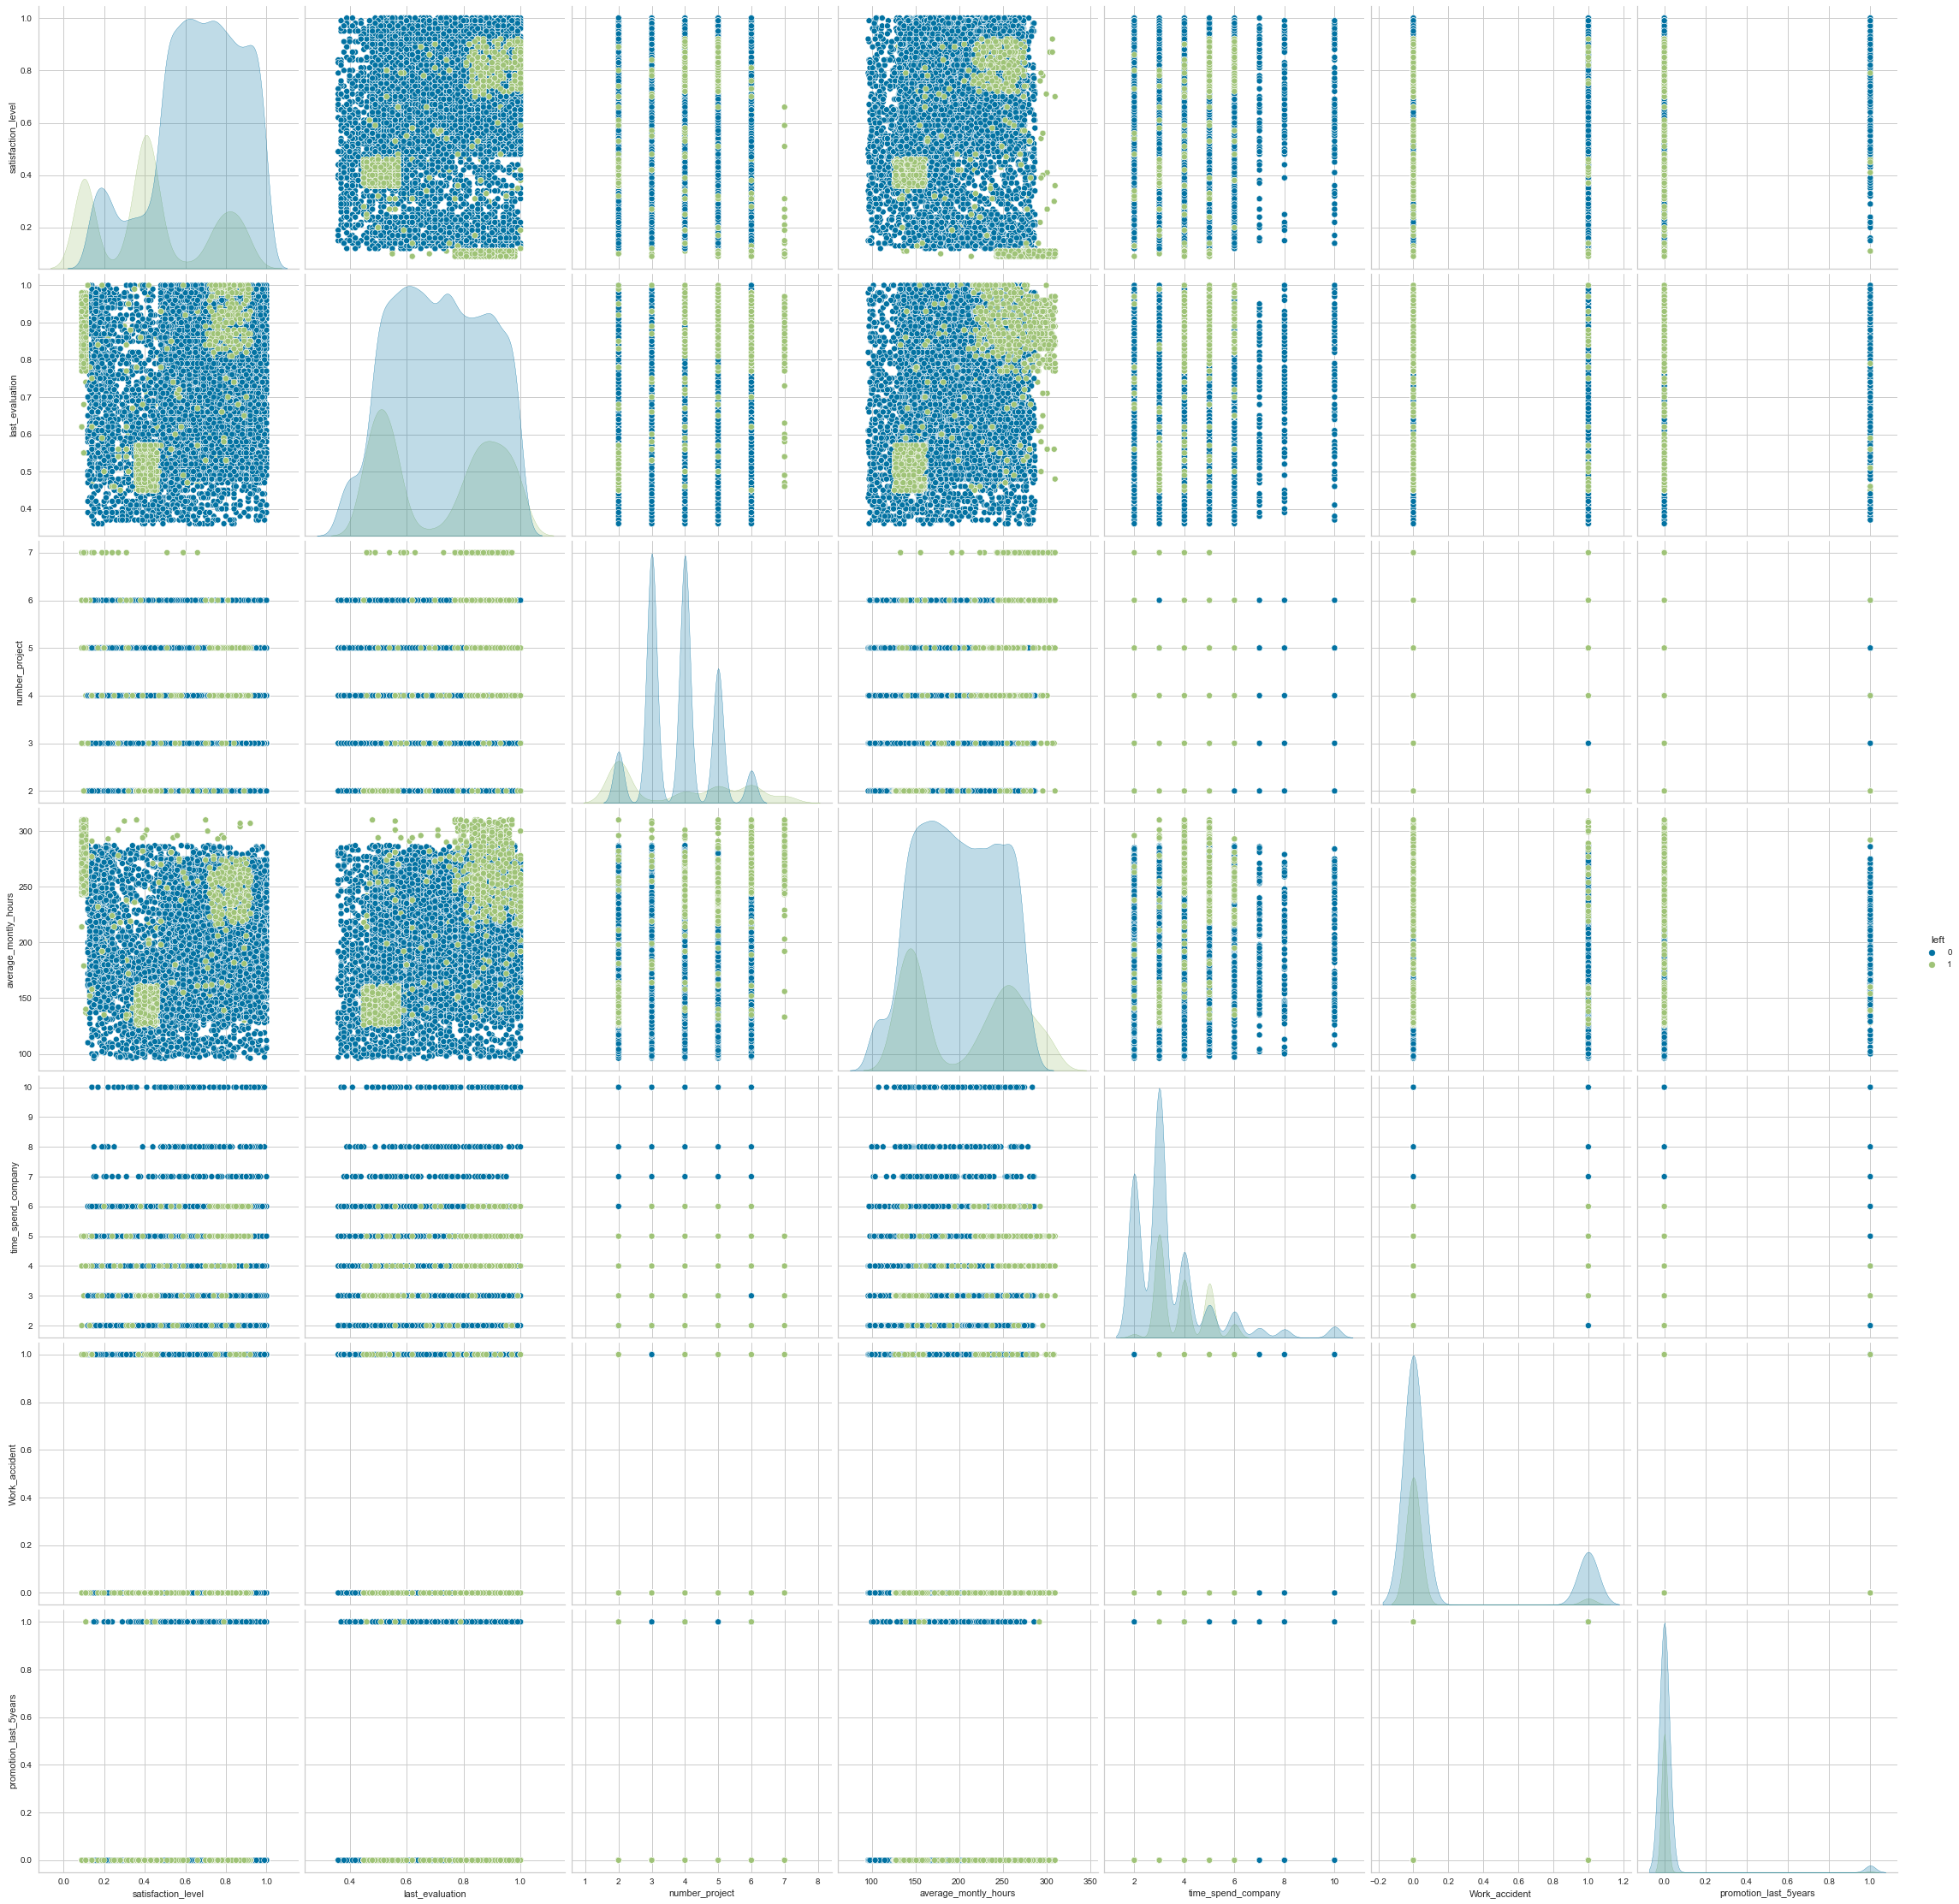

In [120]:
sns.pairplot(df, hue='left',height=4.5)
plt.show()


## Data Preprocessing

<AxesSubplot:>

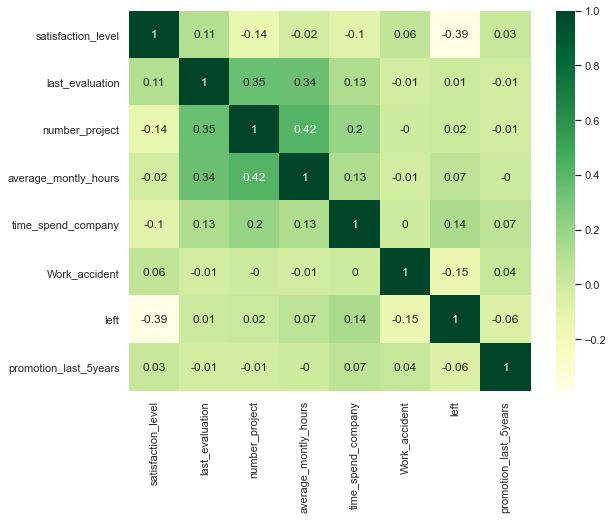

In [20]:
sns.set(rc={'figure.figsize':(9,7)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True ,cmap="YlGn")

In [77]:
data = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [78]:
salary = pd.get_dummies(data['salary'], prefix='salary')
salary

,salary_0,salary_1,salary_2
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [79]:
new_df = pd.concat([data,salary],axis=1)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_0,salary_1,salary_2
0,0.38,157,0,1,0,1,0
1,0.80,262,0,2,0,0,1
2,0.11,272,0,2,0,0,1
3,0.72,223,0,1,0,1,0
4,0.37,159,0,1,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,1,0
14995,0.37,160,0,1,0,1,0
14996,0.37,143,0,1,0,1,0
14997,0.11,280,0,1,0,1,0


In [81]:
new_df.drop(['salary','salary_2'], axis=1, inplace=True)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_0,salary_1
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [82]:
X = new_df.copy()
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_0,salary_1
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [88]:
df = pd.read_csv('HR_comma_sep.csv')
y=df["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

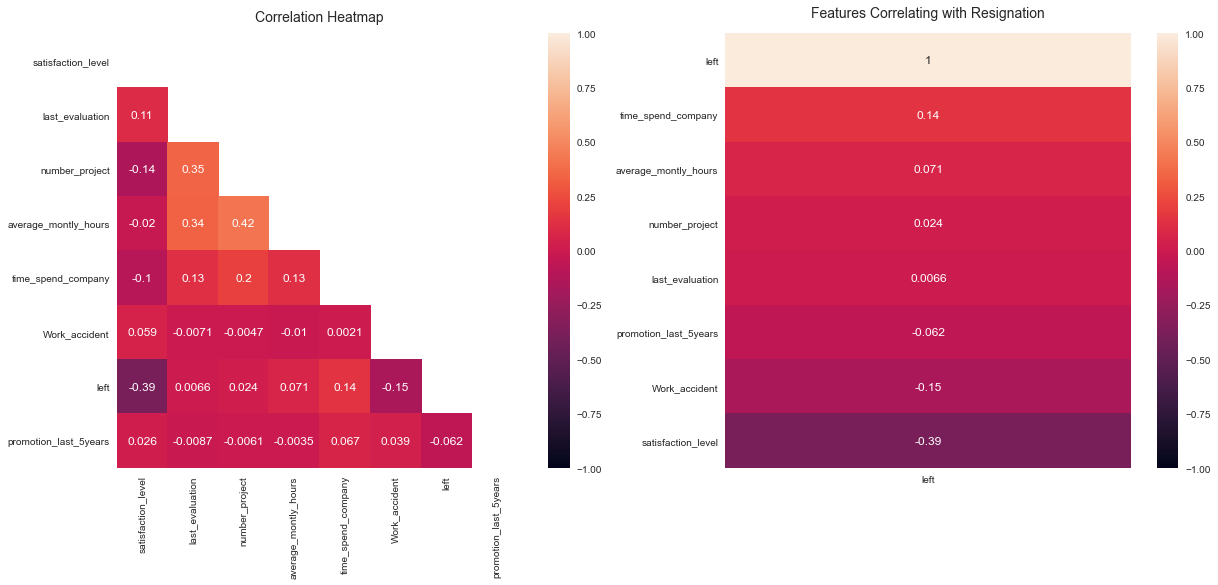

In [90]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0])
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['left']].sort_values(by='left',ascending=False),
vmin=-1, vmax=1, annot=True,ax=ax[1])
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':14}, pad=16);

## Data Modeling using Logistic Regression

In [91]:
 from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassPredictionError

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 42)


In [96]:
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
lr = LogisticRegression(penalty='l2', solver = 'liblinear', random_state=45)
lr_clf = Pipeline([('standardize', scaler),
('log_reg', lr)])


In [97]:
lr_clf


Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg',
                 LogisticRegression(random_state=45, solver='liblinear'))])

In [98]:
 lr_clf.fit(X_train, y_train)


Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg',
                 LogisticRegression(random_state=45, solver='liblinear'))])

In [99]:
 lr_clf.get_params(deep=False)

{'memory': None,
 'steps': [('standardize', StandardScaler()),
  ('log_reg', LogisticRegression(random_state=45, solver='liblinear'))],
 'verbose': False}

In [100]:
 y_pred = lr_clf.predict(X_test)

In [101]:
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.7616666666666667


In [102]:
print("Classification Error :",1 - accuracy_score(y_test, y_pred))

Classification Error : 0.23833333333333329


In [103]:
print("Recall Score",recall_score(y_test, y_pred))

Recall Score 0.22946175637393768


In [104]:
print("precision score: ",precision_score(y_test, y_pred,average=None))


precision score:  [0.7960255  0.48648649]


In [105]:
 print(f1_score(y_test, y_pred))


0.3118383060635226


In [106]:
 print(f1_score(y_test, y_pred,average=None))


[0.85587583 0.31183831]


## ROC Curve 

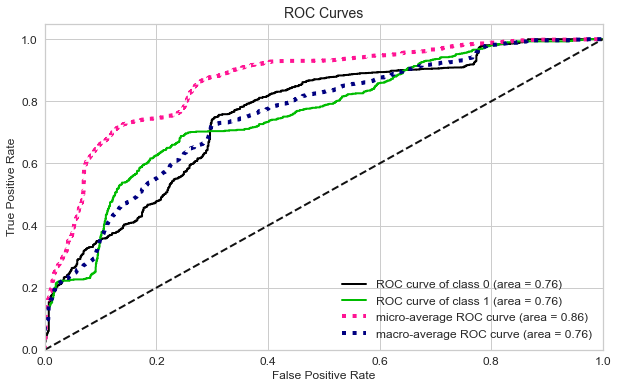

In [107]:
y_probas = lr_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

## Precision Recall Curve

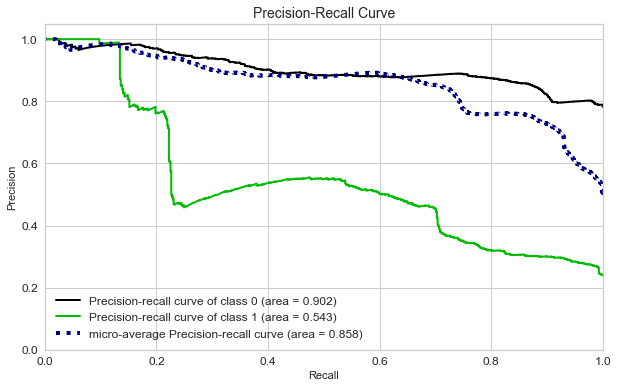

In [108]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


## Learning Curve

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "D:\anaconda\lib\site-packages\sklearn\svm\_base.py", line 926, in _fit_liblinear
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  warnings.warn("Estimator fit failed. Th

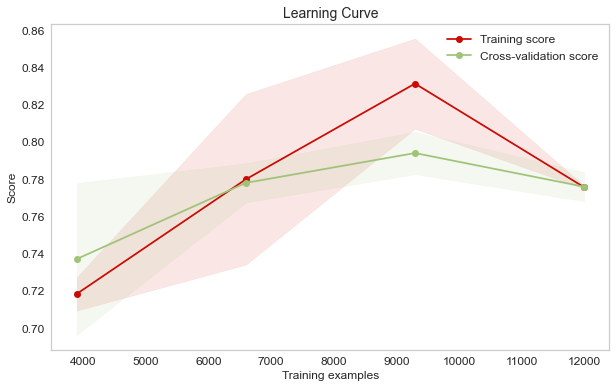

In [109]:
skplt.estimators.plot_learning_curve(lr_clf, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


## Lift Curve

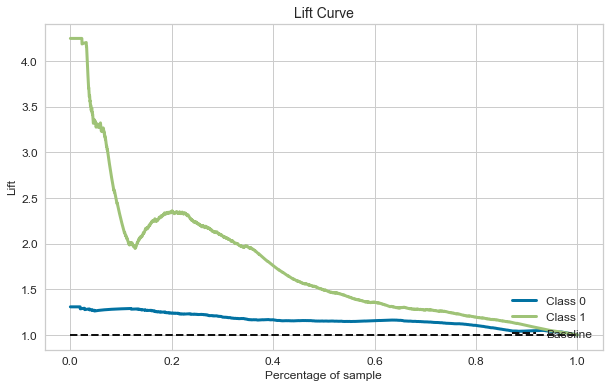

In [110]:
 skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


## Cumulative Gains Curve

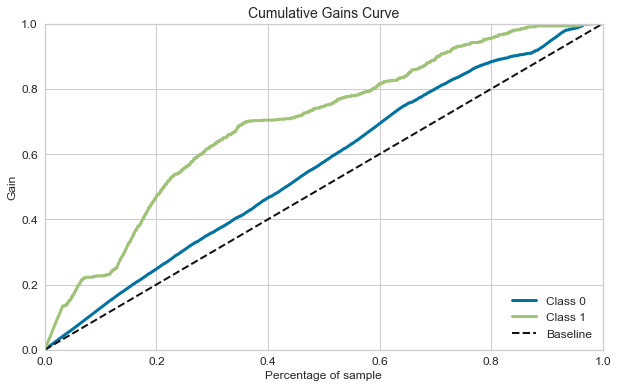

In [111]:
skplt.metrics.plot_cumulative_gain(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


## Confusion Matrix

In [112]:
confusion_matrix(y_test, y_pred)


array([[2123,  171],
       [ 544,  162]], dtype=int64)

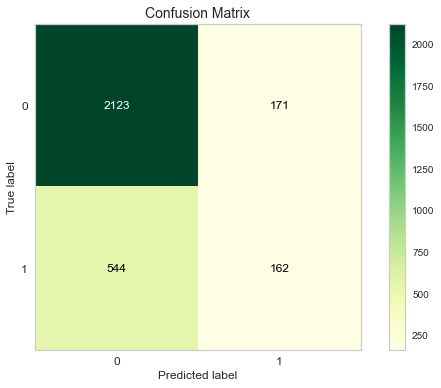

In [118]:
 skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.YlGn)
plt.show()


In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.49      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000



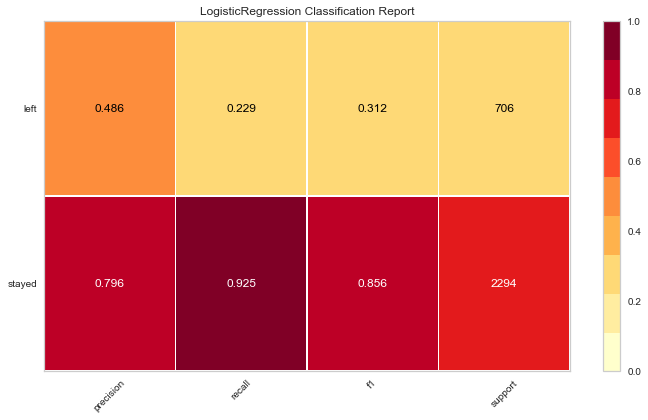

In [116]:
import yellowbrick as yb
plt.figure(figsize=(10,6))
visualizer = yb.classifier.classification_report(lr_clf, X_train, y_train, X_test, y_test, classes=classes, support=True
)
visualizer.show()
plt.show()